## Imports

In [1]:
from wines_sensn import Modelo_XGB_Classifier
import shap
import warnings
import matplotlib.pyplot as plt
import pandas as pd

warnings.filterwarnings("ignore", category=UserWarning)

shap.initjs()

## Análise Simples do Dataset Vinhos

In [2]:
df = pd.read_csv("./assets/winequality-red.csv", sep = ";")

matriz_correlacao = df.select_dtypes(include=['number']).corr().abs()
print(matriz_correlacao["quality"].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


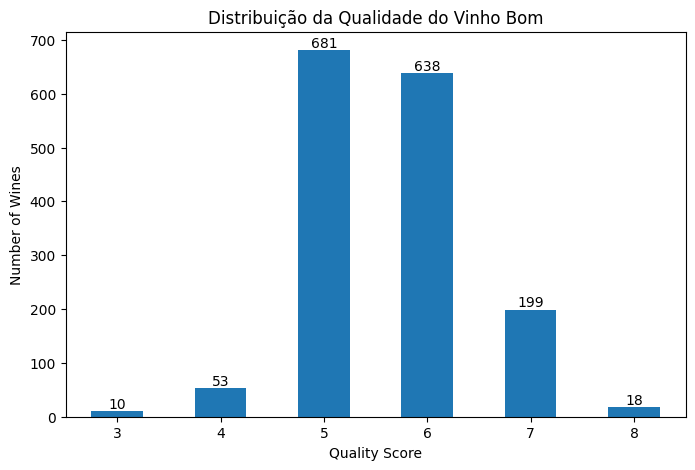

In [3]:
counts = df["quality"].value_counts().sort_index()
ax = counts.plot(kind="bar", figsize=(8,5))

for i, v in enumerate(counts):
    ax.text(i, v + 5, str(v), ha='center')
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.title("Distribuição da Qualidade do Vinho Bom")
plt.xlabel("Quality Score")
plt.ylabel("Number of Wines")
plt.show()

In [4]:
#Mudar para categorização binária
df.rename(columns={'quality': 'good-quality'}, inplace=True)

df['good-quality'] = df['good-quality'].apply(lambda x: 1 if x >= 6 else 0)

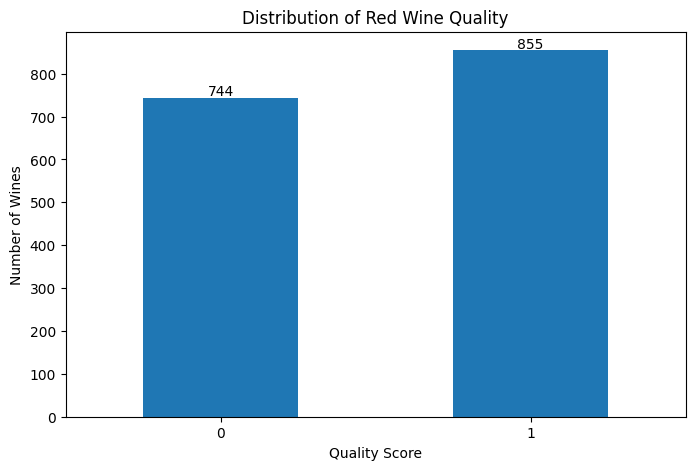

In [5]:
counts = df["good-quality"].value_counts().sort_index()
ax = counts.plot(kind="bar", figsize=(8,5))

for i, v in enumerate(counts):
    ax.text(i, v + 5, str(v), ha='center')
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.title("Distribution of Red Wine Quality")
plt.xlabel("Quality Score")
plt.ylabel("Number of Wines")
plt.show()

In [6]:
display(df.head(10))

display(df.tail(10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good-quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good-quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,0
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,1
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,1
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1


## Importação Modelo Classificador Regressão Logística

In [7]:
modelo_xgbclass = Modelo_XGB_Classifier()
modelo_xgbclass.setup()
modelo_xgbclass.show_existing_classes()
print("Precisão", modelo_xgbclass.model_accuracy())

A Carregar Dataset
Train: 1279 samples
Val: 160 samples
Test: 160 samples
Modelo encontrado!
Boa Qualidade = 1 | Qualidade Amena/Má = 0
Precisão 0.85625


## Análise dos Shap Values

Sample index: 0
True class: 0.0
Predicted class: 0
Prediction probabilities: [0.880008   0.11999201]


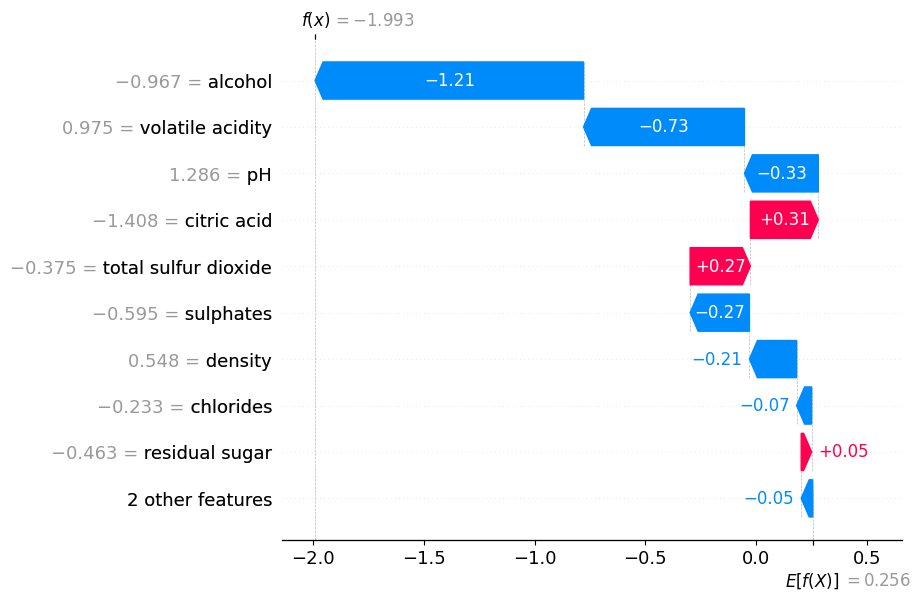

Sample index: 4
True class: 0.0
Predicted class: 0
Prediction probabilities: [0.880008   0.11999201]


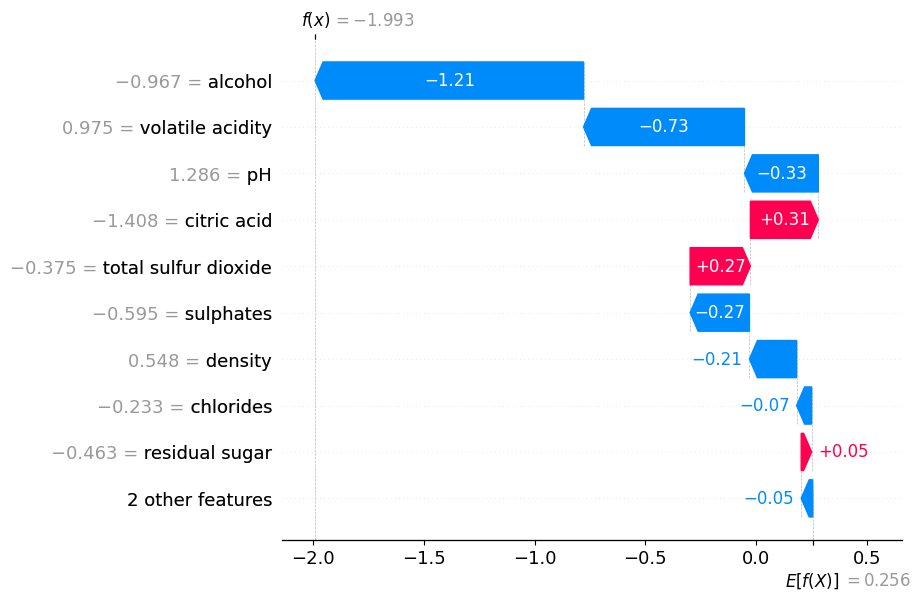

Sample index: 6
True class: 0.0
Predicted class: 0
Prediction probabilities: [0.98609    0.01390998]


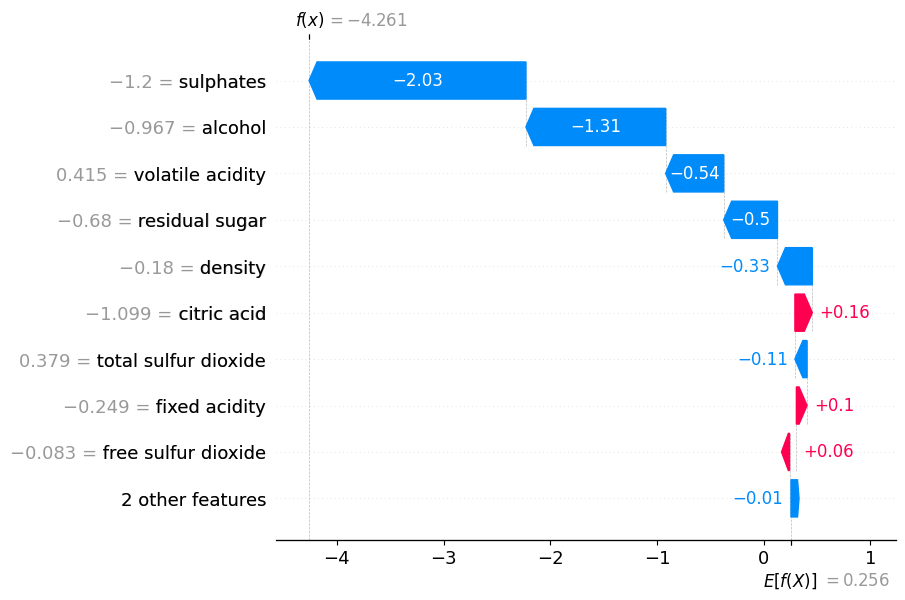

Sample index: 7
True class: 1.0
Predicted class: 1
Prediction probabilities: [0.32189906 0.67810094]


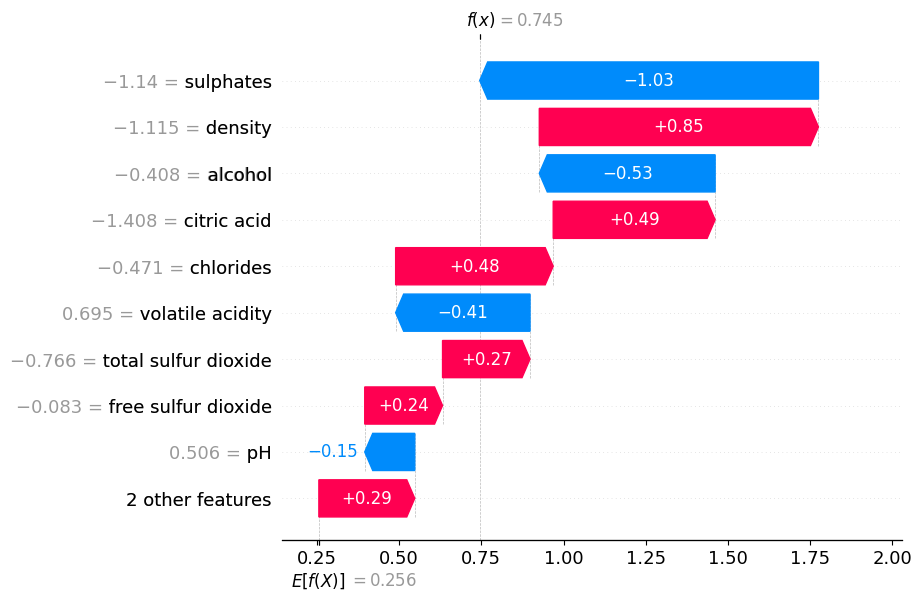

Sample index: 1592
True class: 1.0
Predicted class: 1
Prediction probabilities: [0.05052143 0.94947857]


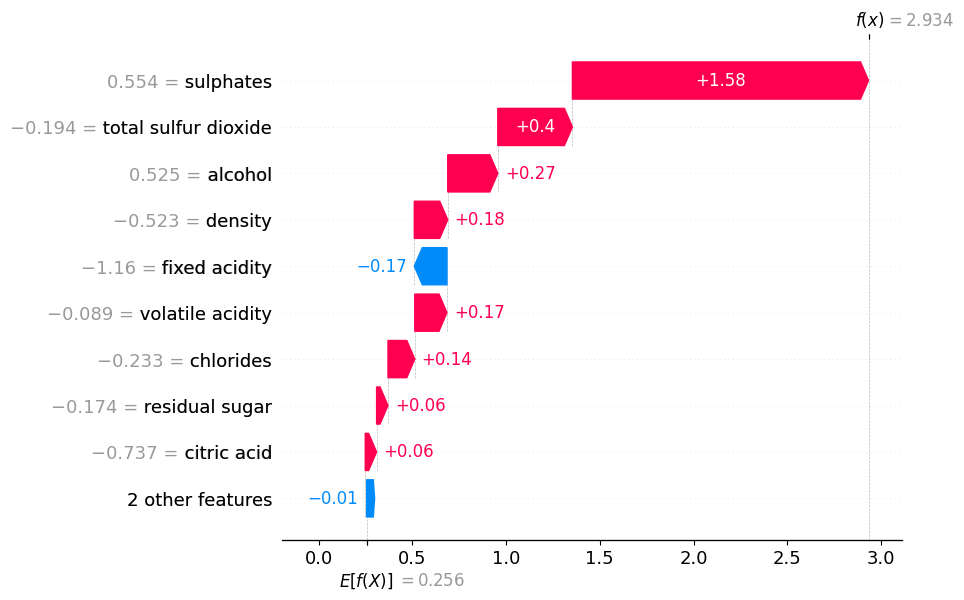

Sample index: 1598
True class: 1.0
Predicted class: 1
Prediction probabilities: [0.09349382 0.9065062 ]


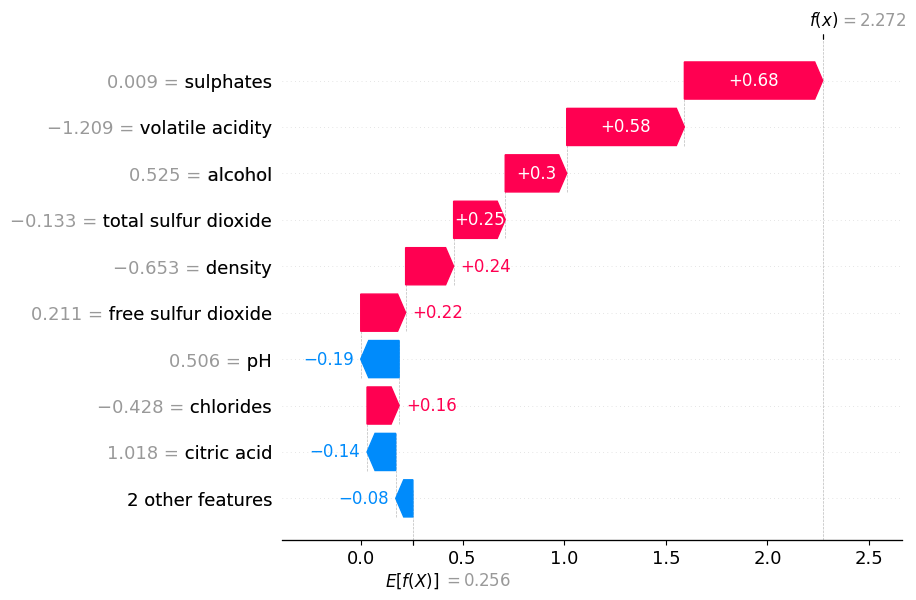

In [8]:
modelo_xgbclass.setup_explainer()
for idx in [0, 4, 6, 7, 1592, 1598]:
    modelo_xgbclass.explain_sample(idx)

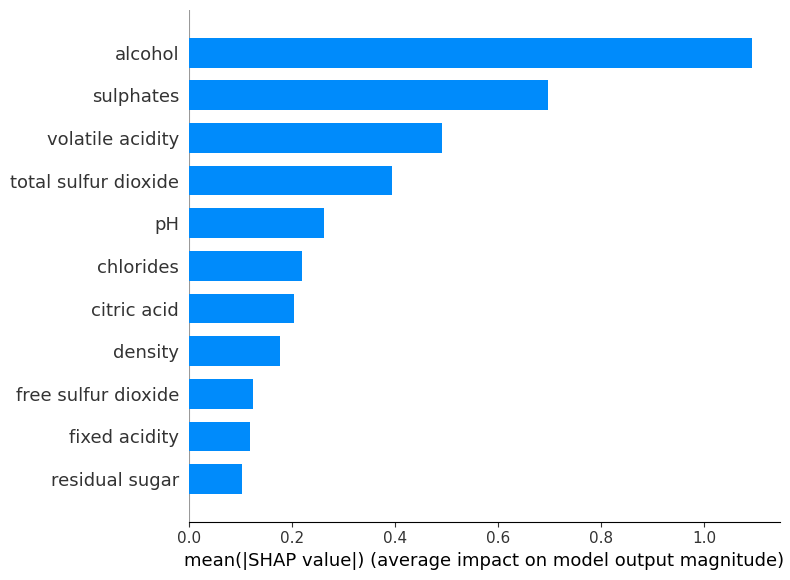

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


In [9]:
shap.summary_plot(
    modelo_xgbclass.explainer(modelo_xgbclass.dataset_scaled.drop(columns=["good-quality"])),
    modelo_xgbclass.dataset_scaled.drop(columns=["good-quality"]),
    plot_type="bar"
)

print(matriz_correlacao["quality"].sort_values(ascending=False))

## Análise Sensitivity-N conforme os Shap Values

Executando Sensitivity-n...

>>> SENSIBILIDADE-N (Pearson r): 0.9034 <<<


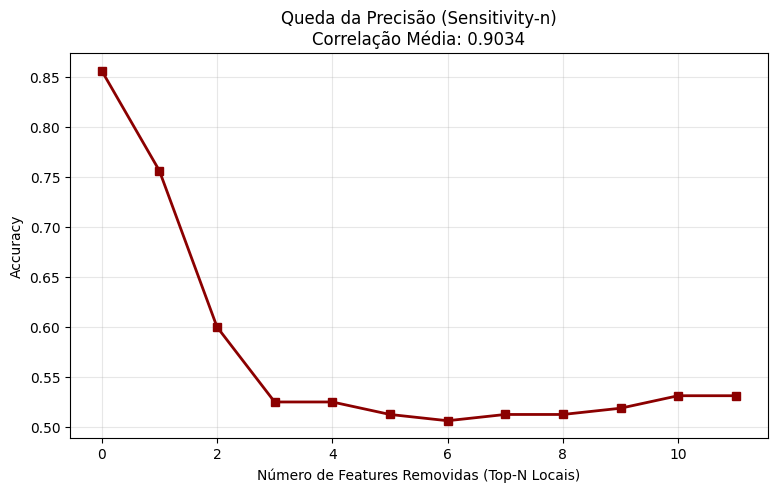

In [12]:
modelo_xgbclass.run_sensitivity_n()

print()